In [82]:
import pandas as pd
import numpy as np
from plotnine import *

In [83]:
title_basics = pd.read_table("title.basics.tsv")
title_basics.head()

/tmp/ipykernel_6203/4095448107.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [84]:
types = title_basics["titleType"].unique()
types

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [85]:
title_basics_series = title_basics[title_basics["titleType"] == "tvSeries"]
title_basics_series["titleType"].unique()

array(['tvSeries'], dtype=object)

In [86]:
title_basics_series = title_basics_series[title_basics_series["startYear"] != "\\N"]

In [87]:

title_basics_series["startYear"].unique()

array(['1943', '1940', '1946', '1947', '1948', '1949', '1952', '1950',
       '1955', '1951', '1956', '1953', '1954', '1957', '1958', '1965',
       '1959', '1960', '1964', '1961', '1962', '1963', '1966', '1967',
       '1968', '1969', '1981', '1970', '1971', '1972', '1975', '1974',
       '1973', '1979', '1976', '1983', '1977', '1978', '1980', '1984',
       '1992', '1982', '1986', '1985', '1987', '1999', '1991', '1988',
       '1989', '1990', '1994', '1993', '1995', '1996', '1997', '2000',
       '1998', '1944', '2002', '2001', '2018', '2020', '2009', '2014',
       '2005', '2015', '2007', '2017', '2012', '1936', '2003', '1924',
       '2008', '1939', '2006', '1937', '1938', '1941', '2004', '2022',
       '2010', '2016', '2021', '1945', '2011', '2013', '1931', '2023',
       '2019', '2024', '2025', '1935', '1930', '1932', '2026', '1928',
       '1933', '1927', '1942'], dtype=object)

In [92]:
# a = pd.to_numeric(title_basics_series["startYear"].values[:])/100
a = title_basics_series["startYear"]
a = a.astype(np.float16)
a = a/10    
a = np.round(a)
# a = pd.Series(a)
# title_basics_series["startYear"] = a
title_basics_series["Year"] = a


array([194., 195., 196., 197., 198., 199., 200., 202., 201., 192., 193.,
       203.], dtype=float16)

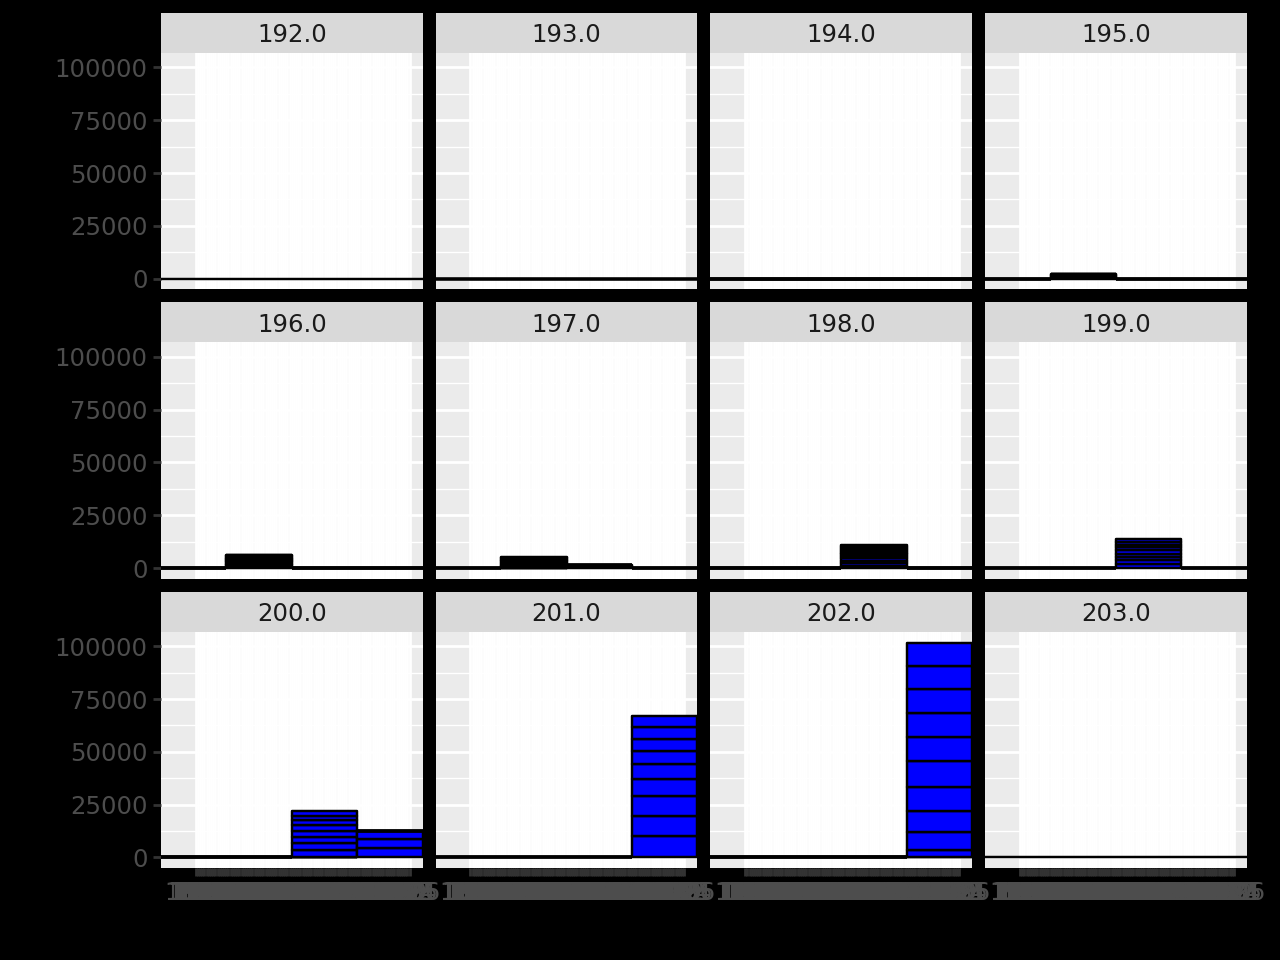

In [95]:
ggplot(title_basics_series) \
+ aes(x="startYear") \
+ geom_histogram(binwidth=30, fill="blue", color="black") \
+ facet_wrap('~ Year')

In [97]:
title_basics_series["Year"].value_counts()

Year
202.0    101695
201.0     67063
200.0     34282
199.0     13565
198.0     10762
197.0      7067
196.0      6324
195.0      2113
194.0        83
193.0        40
203.0         2
192.0         1
Name: count, dtype: int64

In [99]:
title_basics_series = title_basics_series[title_basics_series["Year"] >= 198]

In [110]:
title_basics_series["genres"].value_counts()

genres
Comedy                      31100
Documentary                 22952
Drama                       18764
Reality-TV                  17452
\N                          17161
                            ...  
Biography,Comedy,Family         1
Adventure,Drama,Short           1
Adventure,Family,Horror         1
Comedy,Family,Thriller          1
Comedy,Mystery,Talk-Show        1
Name: count, Length: 1469, dtype: int64

In [113]:
title_basics_series[title_basics_series["genres"] == "Biography,Comedy,Family"]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Year
3851956,tt1529338,tvSeries,Talking Classics,Talking Classics,0,2009,\N,6,"Biography,Comedy,Family",201.0
